# Name: Rawan Mohamed Said
# ID: 4

In [1]:
from pathlib import Path
import os
import nltk
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Data Exploration

In [2]:
file_dir = '/kaggle/input/spam-email-dataset'
os.listdir(file_dir)

['emails.csv']

In [3]:
data = pd.read_csv(os.path.join(file_dir, 'emails.csv'))
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
def print_dataset_samples(data, n_samples=3):
    """
    Print a few samples from the dataset to understand its structure.

    Args:
    - data: The dataset object (assumed to be a pandas DataFrame).
    - n_samples: The number of samples to print.
    """
    print("Displaying a few sample documents from the dataset:")
    print("-" * 80)
    
    random_samples = data.sample(n=n_samples)
    for i, j in random_samples.iterrows():
        # Ensure the index is within bounds of the dataset
        if i >= len(data):
            break
        
        print(f"Sample {i+1}")
        print("-" * 40)
        
        # Assuming column names 'email_text' for content and 'spam' for category
        print(f"Category (Spam/Not Spam): {data.iloc[i]['spam']}")
        print(data.iloc[i]['text'][:500])  # Display first 500 characters of the email text
        print("-" * 80)
        print()


# Print a few sample documents from the training dataset
print("Data Samples:")
print_dataset_samples(data, n_samples=3)

Data Samples:
Displaying a few sample documents from the dataset:
--------------------------------------------------------------------------------
Sample 186
----------------------------------------
Category (Spam/Not Spam): 1
Subject: buy oil stocks now  calgary , alberta , jul 7 , 2005 ( ccnmatthews via comtex ) - - on behalf of smsmobility , inc . ( the company ) ( pink sheets : smso ) president rod burns , is pleased to report that the company has executed a memorandum of understanding ( mou ) with quest oil corporation ( otcbb : qoil ) for a joint venture on two of its development programs in texas . the nettie gardner lease is located in central texas and the eastland county lease is located in north central tex
--------------------------------------------------------------------------------

Sample 5539
----------------------------------------
Category (Spam/Not Spam): 0
Subject: re : real options openings ?  vince ,  thanks very much - i ' m looking forward to it ,  chris  at 0

## Data Cleaning

In [6]:
## Counting the null objects
data.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
# Checking for duplicated data
data.duplicated().sum()

33

In [8]:
# Removing duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [9]:
# Resetting the index after removing the duplicates
data.reset_index(inplace=True)
data

,index,text,spam
0,0,Subject: naturally irresistible your corporate...,1
1,1,Subject: the stock trading gunslinger fanny i...,1
2,2,Subject: unbelievable new homes made easy im ...,1
3,3,Subject: 4 color printing special request add...,1
4,4,"Subject: do not have money , get software cds ...",1
...,...,...,...
5690,5723,Subject: re : research and development charges...,0
5691,5724,"Subject: re : receipts from visit jim , than...",0
5692,5725,Subject: re : enron case study update wow ! a...,0
5693,5726,"Subject: re : interest david , please , call...",0


In [10]:
# Removing the index column
data = data.drop('index', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695 entries, 0 to 5694
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5695 non-null   object
 1   spam    5695 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.1+ KB


## Data Preprocessing

In [11]:
# Lowercasing the text
data['text'] = data['text'].str.lower()
data['text'].head()

0    subject: naturally irresistible your corporate...
1    subject: the stock trading gunslinger  fanny i...
2    subject: unbelievable new homes made easy  im ...
3    subject: 4 color printing special  request add...
4    subject: do not have money , get software cds ...
Name: text, dtype: object

In [12]:
# Removing the word subject at the beginning of each text
data['text'] = data['text'].str.replace(r'^subject\s*', '', case=False, regex=True)
data['text'].head()

0    : naturally irresistible your corporate identi...
1    : the stock trading gunslinger  fanny is merri...
2    : unbelievable new homes made easy  im wanting...
3    : 4 color printing special  request additional...
4    : do not have money , get software cds from he...
Name: text, dtype: object

In [13]:
# Removing the punctuation 
translator = str.maketrans('', '', string.punctuation)  # Create a translation table

# Apply the translation to each row in the 'text' column
data['text'] = data['text'].apply(lambda x: x.translate(translator))
data['text'].head()

0     naturally irresistible your corporate identit...
1     the stock trading gunslinger  fanny is merril...
2     unbelievable new homes made easy  im wanting ...
3     4 color printing special  request additional ...
4     do not have money  get software cds from here...
Name: text, dtype: object

In [14]:
# Tokenizing the text
data['text'] = data['text'].apply(word_tokenize)
data['text'].head()

0    [naturally, irresistible, your, corporate, ide...
1    [the, stock, trading, gunslinger, fanny, is, m...
2    [unbelievable, new, homes, made, easy, im, wan...
3    [4, color, printing, special, request, additio...
4    [do, not, have, money, get, software, cds, fro...
Name: text, dtype: object

In [15]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords (tokens):
    return [word for word in tokens if word not in stop_words]

data['text'] = data['text'].apply(remove_stopwords)
data['text'].head()

0    [naturally, irresistible, corporate, identity,...
1    [stock, trading, gunslinger, fanny, merrill, m...
2    [unbelievable, new, homes, made, easy, im, wan...
3    [4, color, printing, special, request, additio...
4    [money, get, software, cds, software, compatib...
Name: text, dtype: object

In [16]:
# Stemming the words
stemmer = PorterStemmer()
def stemming (tokens):
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

stemmed_data = data.copy()
stemmed_data['text'] = stemmed_data['text'].apply(stemming)
stemmed_data['text'].head()

0    natur irresist corpor ident lt realli hard rec...
1    stock trade gunsling fanni merril muzo colza a...
2    unbeliev new home made easi im want show homeo...
3    4 color print special request addit inform cli...
4    money get softwar cd softwar compat great grow...
Name: text, dtype: object

In [17]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [18]:
# Lemmatizing the words
lemmatizer = WordNetLemmatizer()
def lemmatizing(tokens):
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

lemmatized_data = data.copy()
lemmatized_data['text'] = lemmatized_data['text'].apply(lemmatizing)
lemmatized_data['text'].head()

0    naturally irresistible corporate identity lt r...
1    stock trading gunslinger fanny merrill muzo co...
2    unbelievable new home made easy im wanting sho...
3    4 color printing special request additional in...
4    money get software cd software compatibility g...
Name: text, dtype: object

In [19]:
# Part of speech tagging
def pos_tagging (tokens):
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

pos_tagged = data['text'].apply(pos_tagging)
pos_tagged.head()

0    [(naturally, RB), (irresistible, JJ), (corpora...
1    [(stock, NN), (trading, NN), (gunslinger, NN),...
2    [(unbelievable, JJ), (new, JJ), (homes, NNS), ...
3    [(4, CD), (color, NN), (printing, NN), (specia...
4    [(money, NN), (get, NN), (software, NN), (cds,...
Name: text, dtype: object

## Feature Extraction

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Here I used the lemmatized data (not the stemmed one)

# Bag-of-Words
bow_vectorizer = CountVectorizer()
bow_x = bow_vectorizer.fit_transform(lemmatized_data['text'])
bow_y = lemmatized_data['spam']

# Term Frequency-Inverse Document Frequency (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_x = tfidf_vectorizer.fit_transform(lemmatized_data['text'])
tfidf_y = lemmatized_data['spam']

## Data Splitting

In [21]:
tfidf_x_train, tfidf_x_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidf_x, tfidf_y, test_size=0.2, random_state=42)
bow_x_train, bow_x_test, bow_y_train, bow_y_test = train_test_split(bow_x, bow_y, test_size=0.2, random_state=42)

## Naive Bayes Model

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Here I used the tfidf in training and testing (not bow)

# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(tfidf_x_train, tfidf_y_train)

MultinomialNB()

In [23]:
# Make predictions
nb_train_predictions = nb_model.predict(tfidf_x_train)
nb_test_predictions = nb_model.predict(tfidf_x_test)

# Evaluate the model
train_accuracy = accuracy_score(tfidf_y_train, nb_train_predictions)
print(f'Naive Bayes Training Accuracy: {train_accuracy:.5f}')

test_accuracy = accuracy_score(tfidf_y_test, nb_test_predictions)
print(f'Naive Bayes Test Accuracy: {test_accuracy:.5f}')

Naive Bayes Training Accuracy: 0.92647
Naive Bayes Test Accuracy: 0.88586


In [24]:
print(classification_report(tfidf_y_test, nb_test_predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       843
           1       1.00      0.56      0.72       296

    accuracy                           0.89      1139
   macro avg       0.93      0.78      0.82      1139
weighted avg       0.90      0.89      0.87      1139



## LSTM Model

In [25]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [26]:
# Tokenize and pad sequences for LSTM Model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)
y = to_categorical(data['spam'])

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(2, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - accuracy: 0.8130 - loss: 0.4677 - val_accuracy: 0.9145 - val_loss: 0.2095
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.9730 - loss: 0.1169 - val_accuracy: 0.9792 - val_loss: 0.0853
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.9924 - loss: 0.0520 - val_accuracy: 0.9803 - val_loss: 0.0582
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.9995 - loss: 0.0057 - val_accuracy: 0.9825 - val_loss: 0.0742
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9803 - val_loss: 0.0925


In [29]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print("LSTM Accuracy:", accuracy)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9795 - loss: 0.0856
LSTM Accuracy: 0.982440710067749


## Comparing the results from the 2 models

In [30]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [31]:
# Get predictions from Naive Bayes model
nb_predictions = nb_model.predict(tfidf_x_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy_nb = accuracy_score(tfidf_y_test, nb_test_predictions)
precision_nb = precision_score(tfidf_y_test, nb_test_predictions)
recall_nb = recall_score(tfidf_y_test, nb_test_predictions)
f1_nb = f1_score(tfidf_y_test, nb_test_predictions)

# Print classification report
print("Naive Bayes Classification Report:")
print(classification_report(tfidf_y_test, nb_test_predictions))

# Print the scores
print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}, Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}, F1-score: {f1_nb:.4f}")

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       843
           1       1.00      0.56      0.72       296

    accuracy                           0.89      1139
   macro avg       0.93      0.78      0.82      1139
weighted avg       0.90      0.89      0.87      1139

Naive Bayes - Accuracy: 0.8859, Precision: 1.0000, Recall: 0.5608, F1-score: 0.7186


In [32]:
# Get predictions from LSTM model
lstm_predictions = lstm_model.predict(X_test)
lstm_predicted_labels = np.argmax(lstm_predictions, axis=1)

# If y_test is one-hot encoded, convert it back to binary labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy_lstm = accuracy_score(y_test, lstm_predicted_labels)
precision_lstm = precision_score(y_test, lstm_predicted_labels)
recall_lstm = recall_score(y_test, lstm_predicted_labels)
f1_lstm = f1_score(y_test, lstm_predicted_labels)

# Print classification report
print("LSTM Classification Report:")
print(classification_report(y_test, lstm_predicted_labels))

# Print the scores
print(f"LSTM - Accuracy: {accuracy_lstm:.4f}, Precision: {precision_lstm:.4f}, Recall: {recall_lstm:.4f}, F1-score: {f1_lstm:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       0.99      0.95      0.97       296

    accuracy                           0.98      1139
   macro avg       0.98      0.97      0.98      1139
weighted avg       0.98      0.98      0.98      1139

LSTM - Accuracy: 0.9824, Precision: 0.9859, Recall: 0.9459, F1-score: 0.9655


In [33]:
print("=== Model Comparison ===")
print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}, Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}, F1-score: {f1_nb:.4f}")
print(f"LSTM        - Accuracy: {accuracy_lstm:.4f}, Precision: {precision_lstm:.4f}, Recall: {recall_lstm:.4f}, F1-score: {f1_lstm:.4f}")

=== Model Comparison ===
Naive Bayes - Accuracy: 0.8859, Precision: 1.0000, Recall: 0.5608, F1-score: 0.7186
LSTM        - Accuracy: 0.9824, Precision: 0.9859, Recall: 0.9459, F1-score: 0.9655


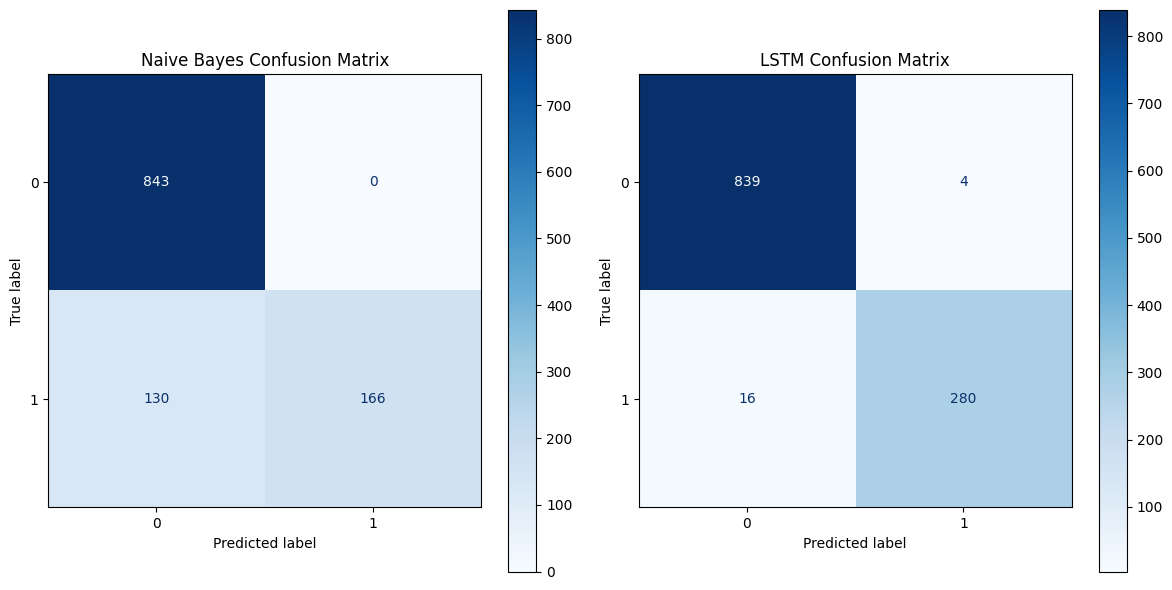

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Naive Bayes Confusion Matrix
nb_conf_matrix = confusion_matrix(tfidf_y_test, nb_test_predictions)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp_nb.plot(cmap=plt.cm.Blues, ax=ax1)  # Plot in first subplot (ax1)
ax1.set_title("Naive Bayes Confusion Matrix")

# LSTM Confusion Matrix
lstm_conf_matrix = confusion_matrix(y_test, lstm_predicted_labels)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=lstm_conf_matrix)
disp_lstm.plot(cmap=plt.cm.Blues, ax=ax2)  # Plot in second subplot (ax2)
ax2.set_title("LSTM Confusion Matrix")

# Adjust layout and display
plt.tight_layout()
plt.show()